**CÓDIGO PARA EL TRABAJO DE FIN DE GRADO**


---


*Análisis de impacto de las características sociodemográfics y del tipo de suscripción en la satsfacción del ususario con las recomendaciones personalizadas.*


---
Aitana Herrero Castro | 5ºE2 ANALYTICS


# **1. Carga y limpieza de datos**


In [30]:
# BIBLIOTECAS Y LIBRERÍAS NECESARIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [31]:
from google.colab import files

upload_file = files.upload()

for filename in upload_file.keys():
    print(f'Archivo subido: {filename}')



Saving Spotify_data.xlsx to Spotify_data (2).xlsx
Archivo subido: Spotify_data (2).xlsx


In [32]:
spotify_data = pd.read_excel('Spotify_data.xlsx')
spotify_data.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


# **2. Análisis Descriptivo**

In [49]:
# Dimensiones del dataset
print("Filas y columnas:", spotify_data.shape)

# Tipo de datos
print("\nTipos de datos:")
print(spotify_data.dtypes)

# Número de valores nulos por columna
print("\nValores nulos por columna:")
print(spotify_data.isnull().sum())

# Estadísticas generales
print("\nEstadísticas generales:")
print(spotify_data.describe())

Filas y columnas: (520, 20)

Tipos de datos:
Age                            category
Gender                         category
spotify_usage_period             object
spotify_listening_device         object
spotify_subscription_plan      category
premium_sub_willingness          object
preffered_premium_plan           object
preferred_listening_content      object
fav_music_genre                  object
music_time_slot                  object
music_Influencial_mood           object
music_lis_frequency              object
music_expl_method                object
music_recc_rating                 int64
pod_lis_frequency                object
fav_pod_genre                    object
preffered_pod_format             object
pod_host_preference              object
preffered_pod_duration           object
pod_variety_satisfaction         object
dtype: object

Valores nulos por columna:
Age                              0
Gender                           0
spotify_usage_period             0
spotify_

In [34]:
# Eliminar filas con más del 50% de columnas vacías
spotify_data_clean = spotify_data.dropna(thresh=spotify_data.shape[1] * 0.5)

In [50]:
print("Filas después de eliminar vacíos extremos:", spotify_data_clean.shape[0])


Filas después de eliminar vacíos extremos: 234


In [51]:
# Rellenar con 'Unknown' donde haya texto faltante
spotify_data_clean = spotify_data_clean.fillna({
    'fav_music_genre': 'Unknown',
    'fav_pod_genre': 'Unknown',
    'music_expl_method': 'Unknown',
    'music_time_slot': 'Unknown',
    'music_Influencial_mood': 'Unknown',
    'pod_lis_frequency': 'Unknown',
    'pod_variety_satisfaction': 'Unknown'
})

In [37]:
# Eliminar cualquier fila que aún tenga valores nulos
spotify_data_clean = spotify_data_clean.dropna()

In [38]:
print("Valores nulos restantes por columna:")
print(spotify_data_clean.isnull().sum())


Valores nulos restantes por columna:
Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64


**DISTRIBUCIÓN DE LAS CARACTERÍSTICAS DEMOGRÁFICAS: EDAD**

<ipython-input-39-3785522093>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=spotify_data, palette='Set2', order=order)


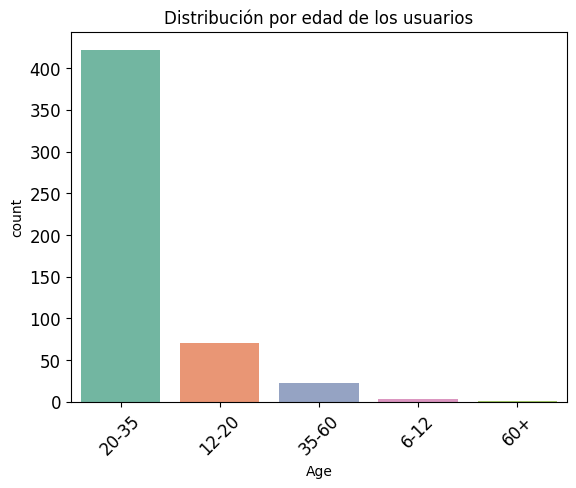

In [39]:
order = spotify_data['Age'].value_counts().index
sns.countplot(x='Age', data=spotify_data, palette='Set2', order=order)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribución por edad de los usuarios')
plt.show()

**DISTRIBUCIÓN DE LAS CARACTERÍSTICAS DEMOGRÁFICAS: GÉNERO**

<ipython-input-40-3235094468>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=spotify_data, palette='Set2', order=order)


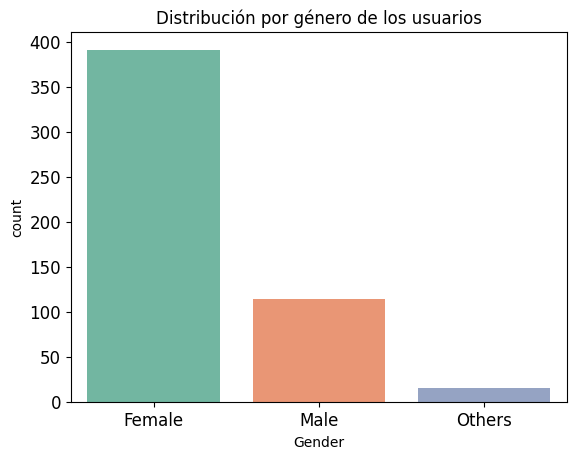

In [40]:
order = spotify_data['Gender'].value_counts().index
sns.countplot(x='Gender', data=spotify_data, palette='Set2', order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribución por género de los usuarios')
plt.show()

In [41]:
# Estadísticas descriptivas para las variables demográficas
print(spotify_data[['Age', 'Gender']].describe())


          Age  Gender
count     520     520
unique      5       3
top     20-35  Female
freq      422     391


<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)


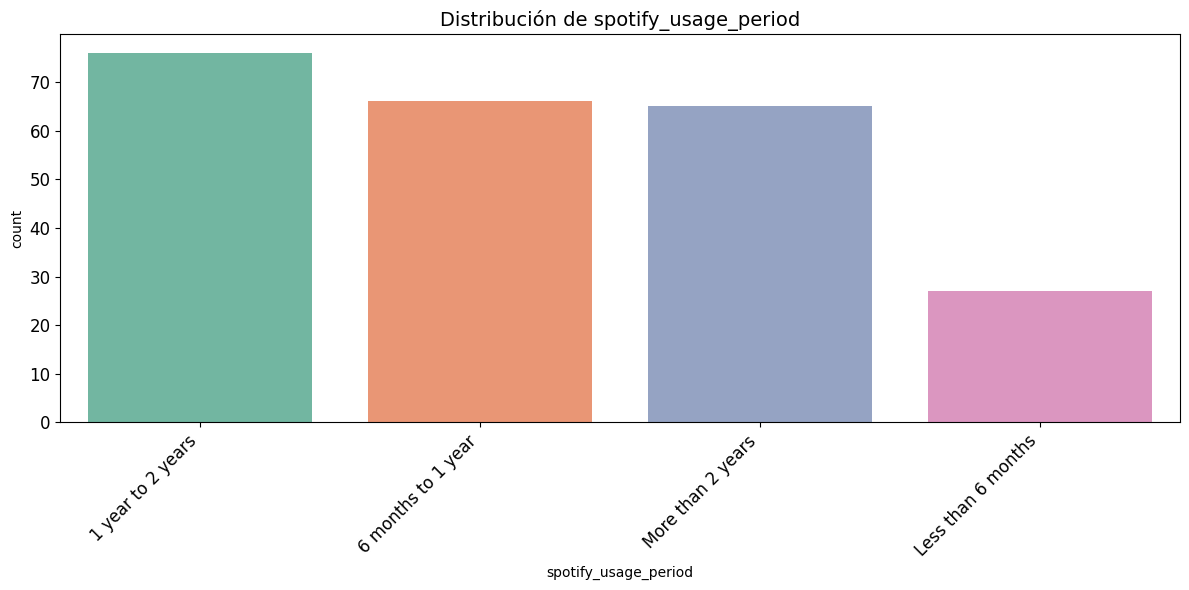

<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)
<ipython-input-42-2980986727>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


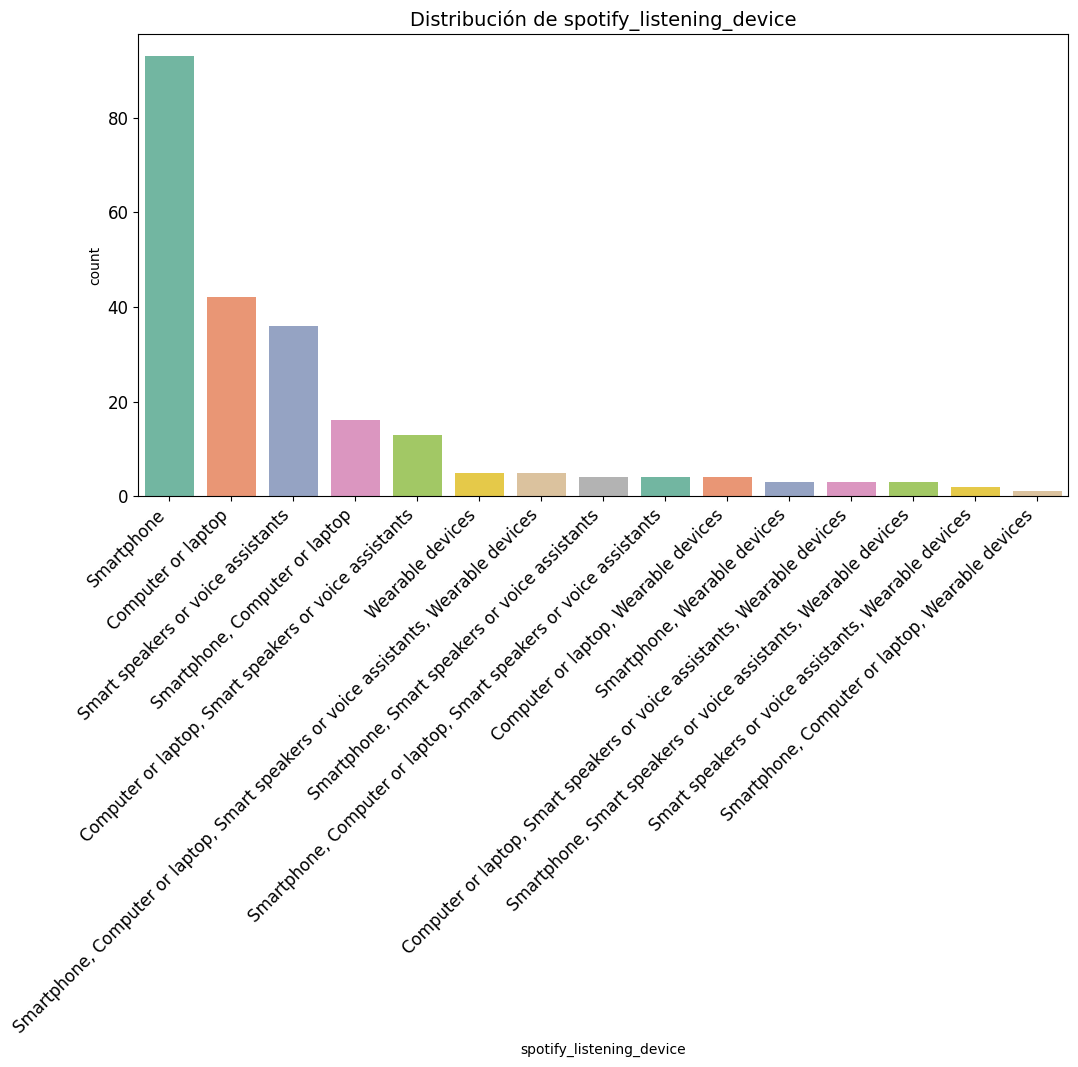

<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)


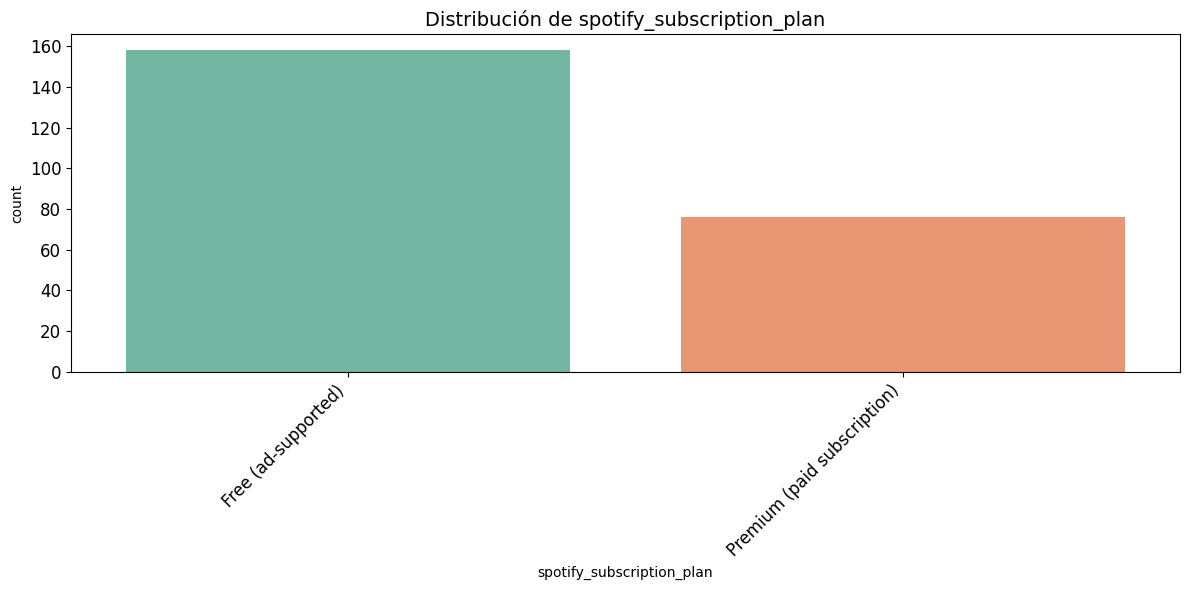

<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)


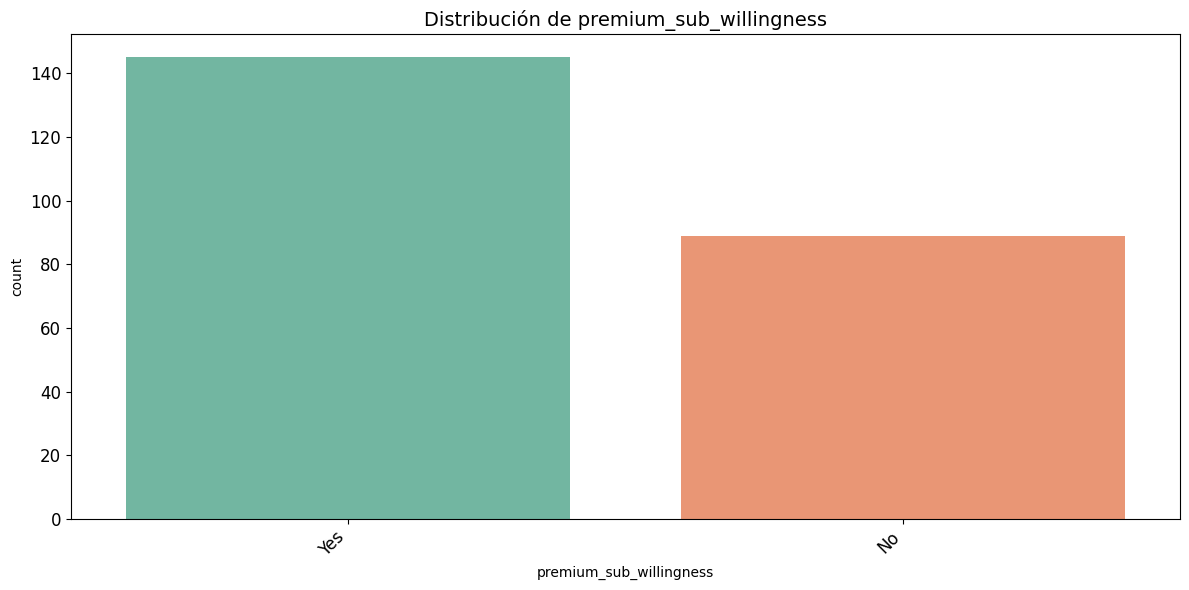

<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)


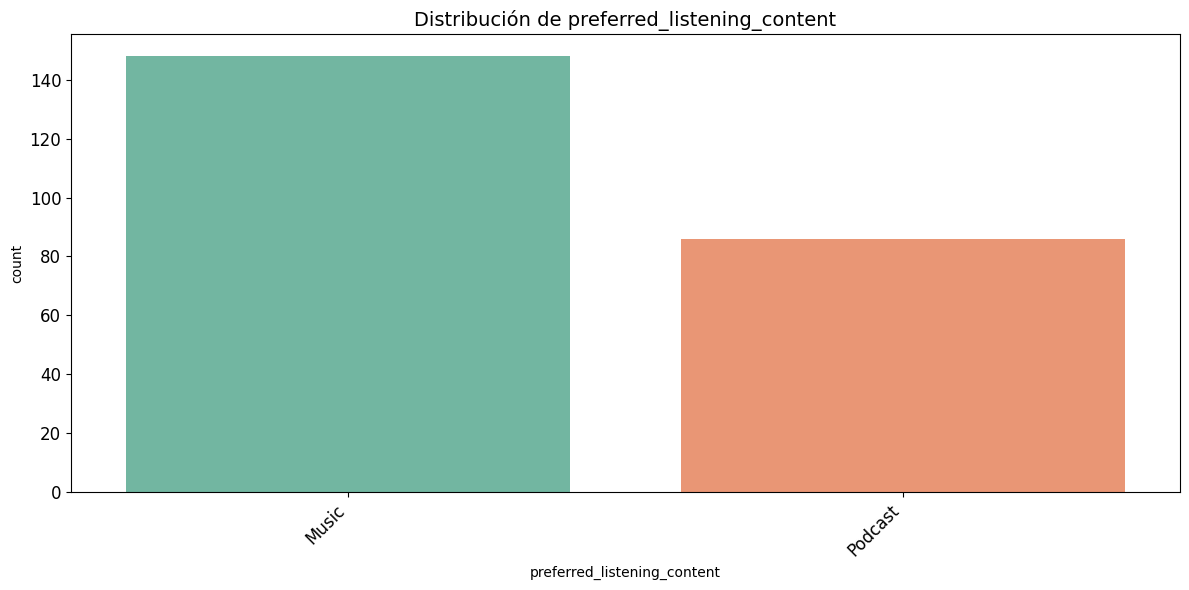

<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)


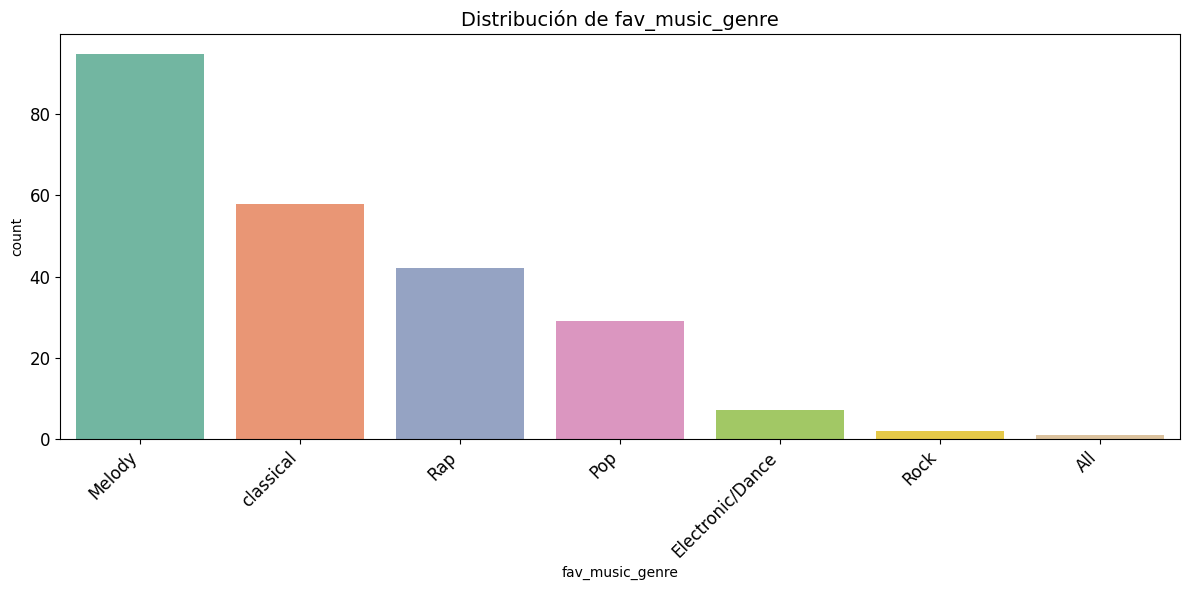

<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)


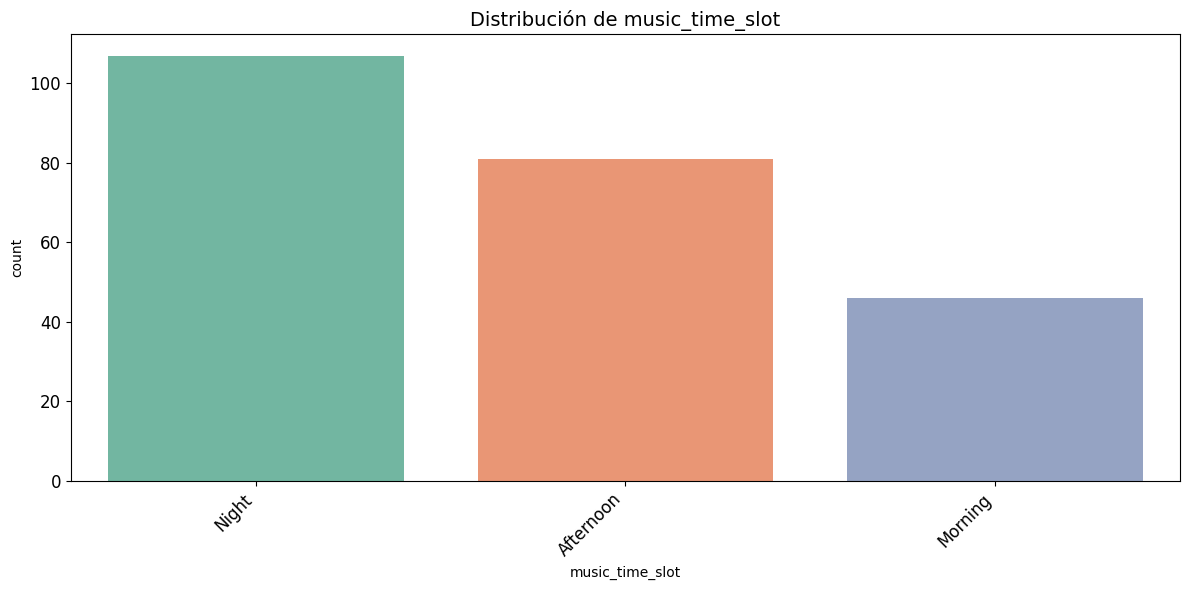

<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)
<ipython-input-42-2980986727>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


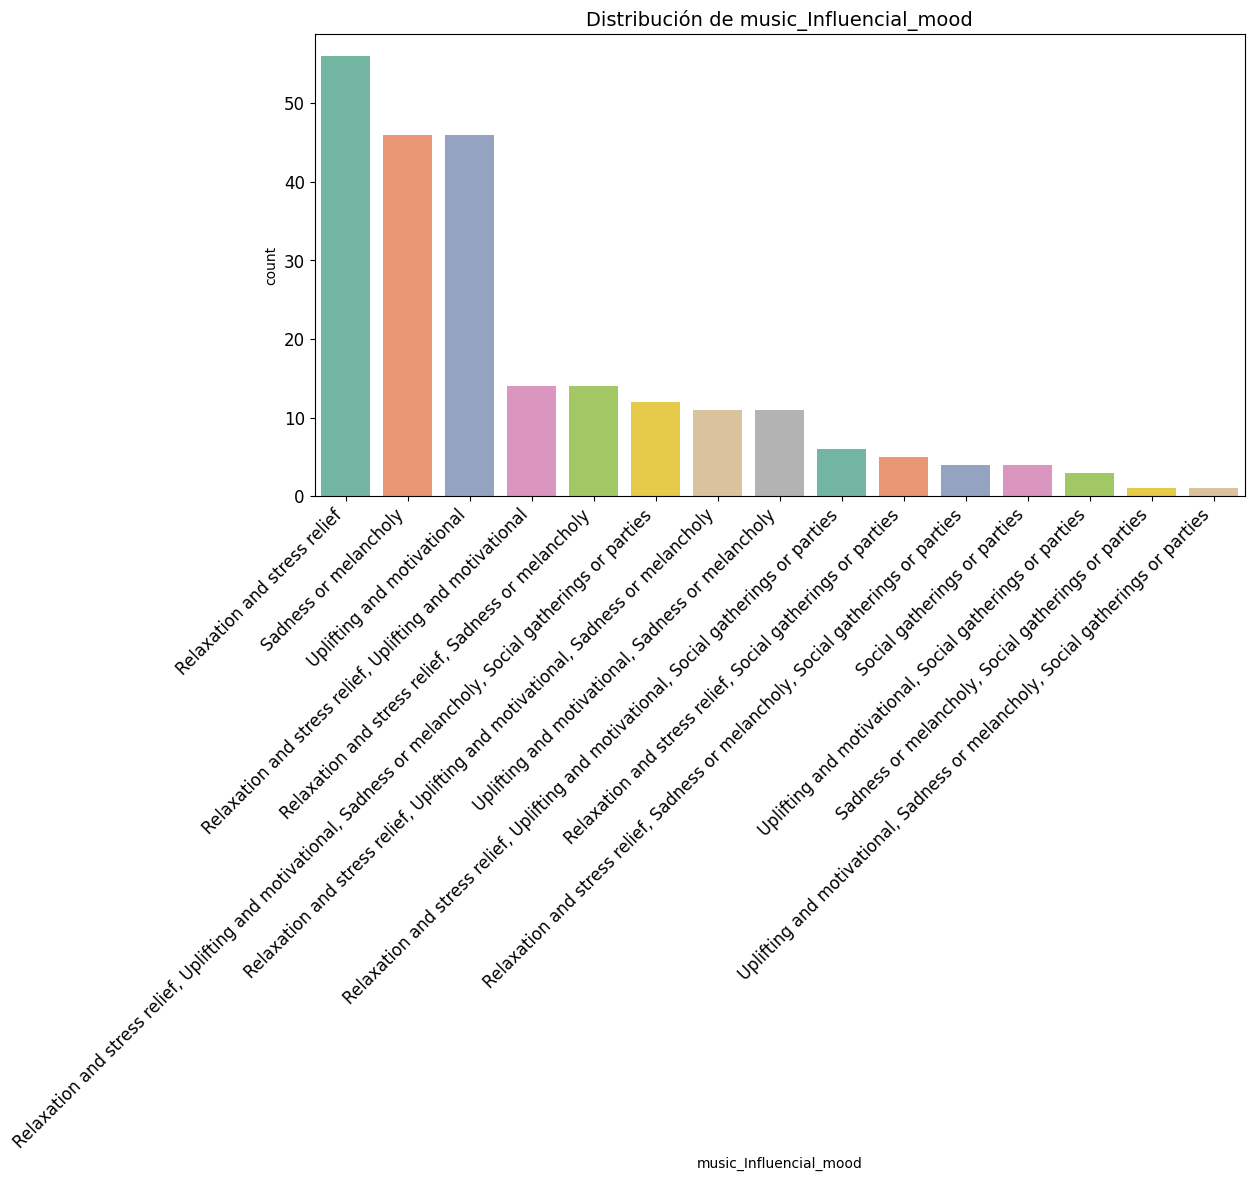

<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)


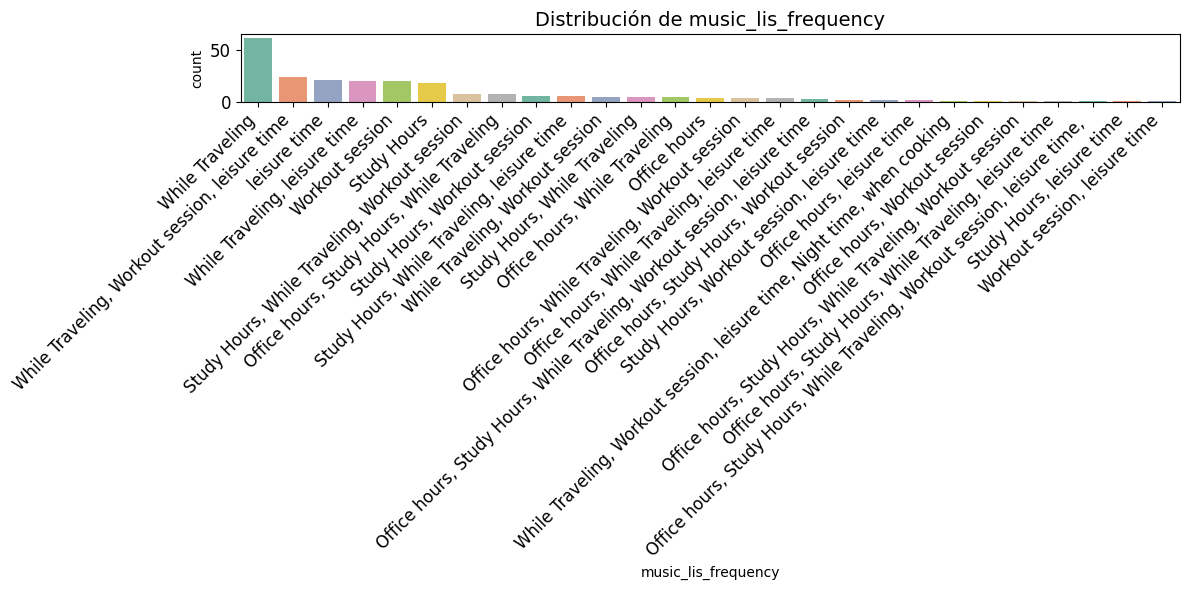

<ipython-input-42-2980986727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)


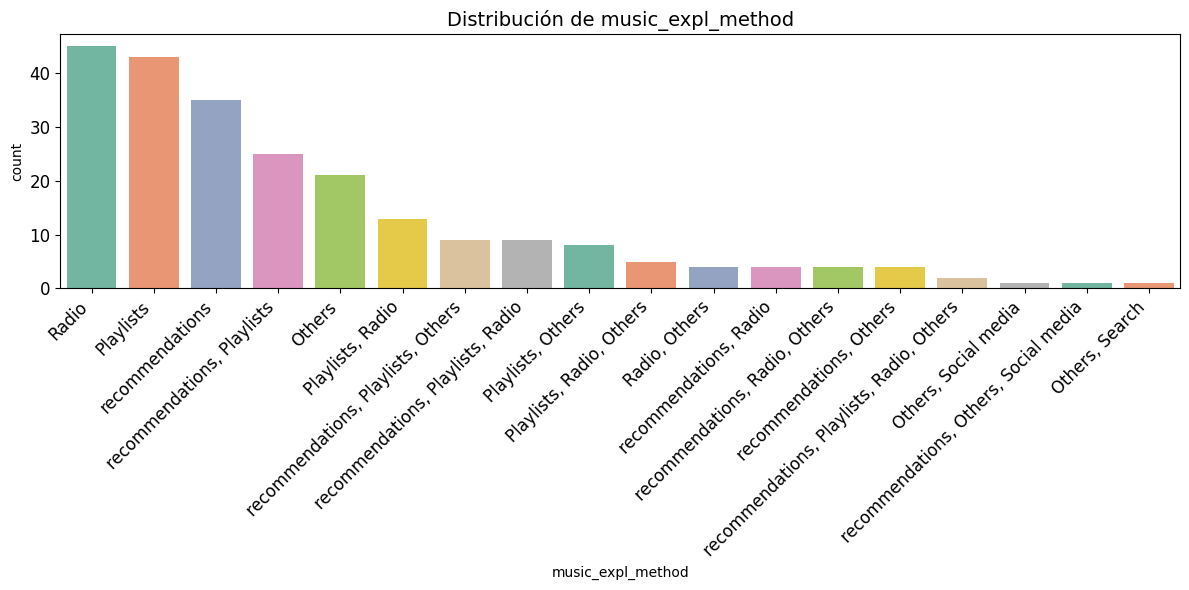


Estadísticas descriptivas para music_recc_rating:
count    234.000000
mean       3.303419
std        0.966071
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: music_recc_rating, dtype: float64


<ipython-input-42-2980986727>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fav_music_genre', y='music_recc_rating', data=spotify_data_clean, palette='Set2', order=order)


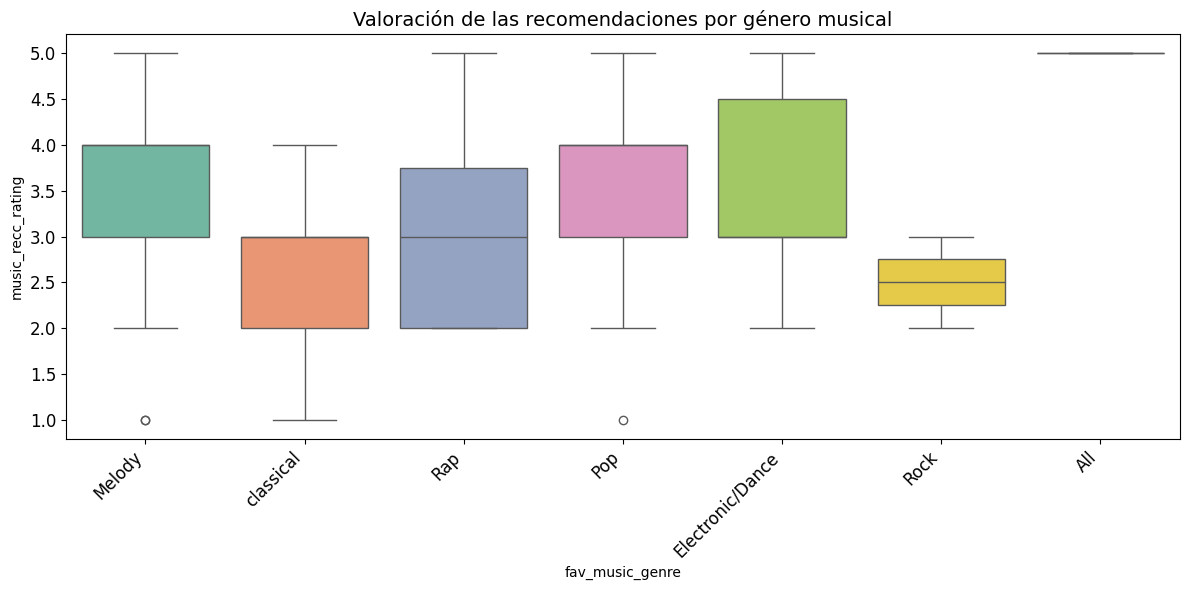

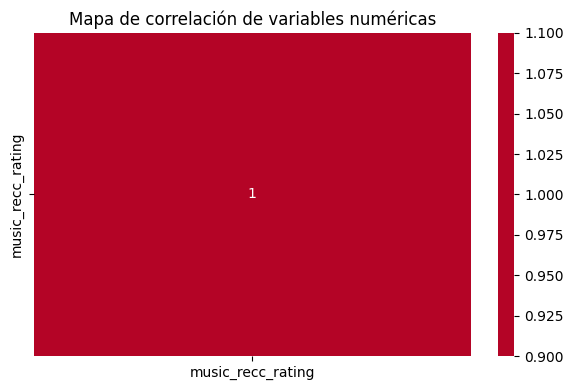


Estadísticas generales del dataset completo:
          Age  Gender spotify_usage_period spotify_listening_device  \
count     234     234                  234                      234   
unique      5       3                    4                       15   
top     20-35  Female    1 year to 2 years               Smartphone   
freq      176     187                   76                       93   
mean      NaN     NaN                  NaN                      NaN   
std       NaN     NaN                  NaN                      NaN   
min       NaN     NaN                  NaN                      NaN   
25%       NaN     NaN                  NaN                      NaN   
50%       NaN     NaN                  NaN                      NaN   
75%       NaN     NaN                  NaN                      NaN   
max       NaN     NaN                  NaN                      NaN   

       spotify_subscription_plan premium_sub_willingness  \
count                        234         

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas y numéricas
categorical_vars = [
    'spotify_usage_period',
    'spotify_listening_device',
    'spotify_subscription_plan',
    'premium_sub_willingness',
    'preferred_listening_content',
    'fav_music_genre',
    'music_time_slot',
    'music_Influencial_mood',
    'music_lis_frequency',
    'music_expl_method'
]

numeric_vars = ['music_recc_rating']

# 1. Distribución de variables categóricas con orden descendente y mayor tamaño de fuente
for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    order = spotify_data_clean[var].value_counts().index
    sns.countplot(x=var, data=spotify_data_clean, palette='Set2', order=order)
    plt.title(f'Distribución de {var}', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# 2. Estadísticas descriptivas de variable numérica
for var in numeric_vars:
    print(f"\nEstadísticas descriptivas para {var}:")
    print(spotify_data_clean[var].describe())

# 3. Boxplot de valoración por género musical
plt.figure(figsize=(12, 6))
order = spotify_data_clean['fav_music_genre'].value_counts().index
sns.boxplot(x='fav_music_genre', y='music_recc_rating', data=spotify_data_clean, palette='Set2', order=order)
plt.title('Valoración de las recomendaciones por género musical', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 4. Mapa de correlación de variables numéricas
plt.figure(figsize=(6, 4))
correlation = spotify_data_clean[numeric_vars].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de correlación de variables numéricas')
plt.tight_layout()
plt.show()

# 5. Estadísticas generales del dataset
print("\nEstadísticas generales del dataset completo:")
print(spotify_data_clean.describe(include='all'))




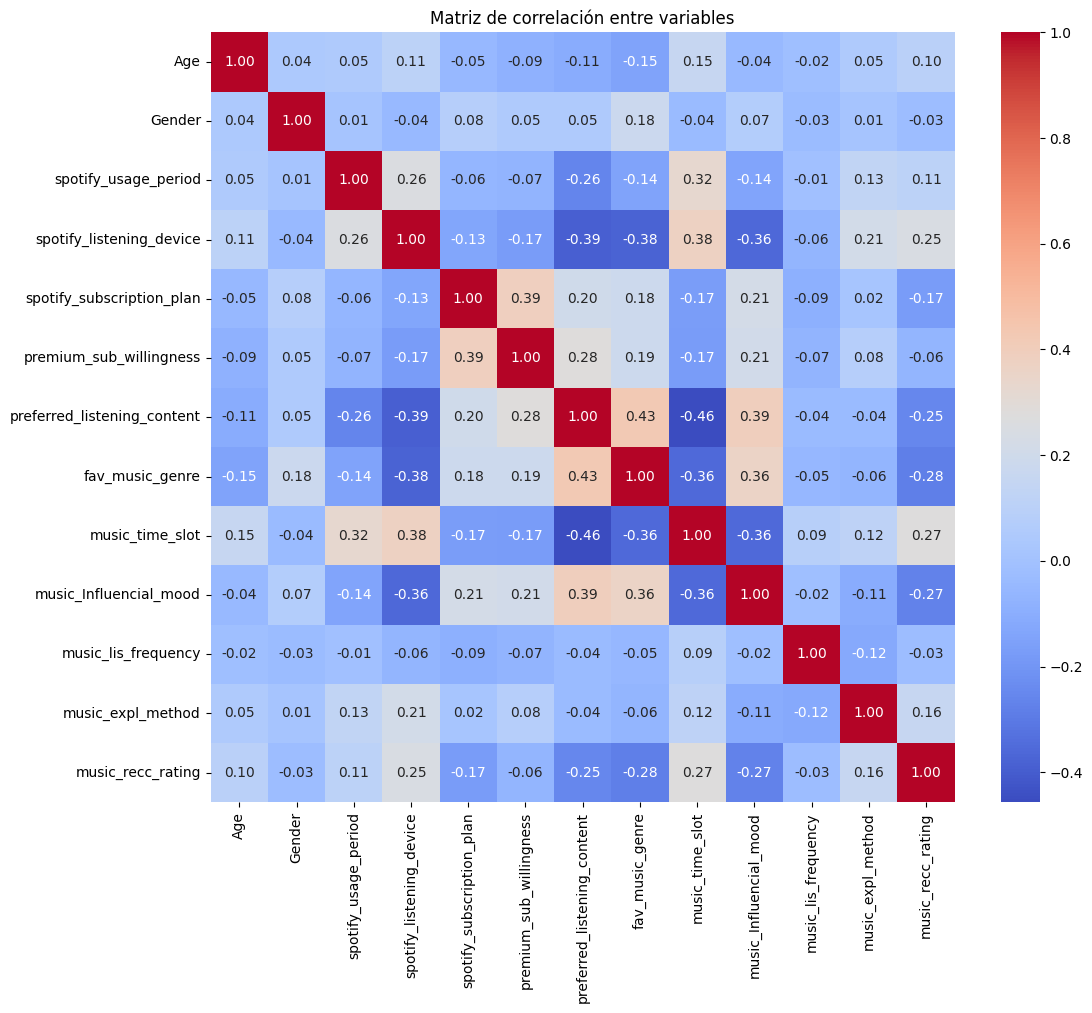


Media de rating según grupos de edad:
    Age  music_recc_rating
0    0           3.112676
1    1           3.578199
2    2           3.391304
3    3           3.000000
4    4           4.000000

Media de rating según género:
    Gender  music_recc_rating
0       0           3.498721
1       1           3.596491
2       2           2.933333

Media de rating según tipo de suscripción:
    spotify_subscription_plan  music_recc_rating
0                          0           3.584906
1                          1           3.145833


In [43]:
# Cargar el dataset (ajustar la ruta si es necesario)
data = pd.read_excel("Spotify_data.xlsx")

# Filtrado de las columnas relevantes (sin variables de podcast)
cols = [
    'Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
    'spotify_subscription_plan', 'premium_sub_willingness',
    'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
    'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
    'music_recc_rating'
]

df = data[cols].copy()

# Convertir variables categóricas a numéricas con LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

#Matriz de correlación
corr = df.corr()

# Plot del heatmap de correlaciones
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación entre variables")
plt.show()

# Análisis bivariado (Age vs Satisfacción)
age_rating = df.groupby('Age')['music_recc_rating'].mean().reset_index()
print("\nMedia de rating según grupos de edad:\n", age_rating)

# Análisis bivariado (Gender vs Satisfacción)
gender_rating = df.groupby('Gender')['music_recc_rating'].mean().reset_index()
print("\nMedia de rating según género:\n", gender_rating)

# Análisis bivariado (Plan de suscripción vs Satisfacción)
plan_rating = df.groupby('spotify_subscription_plan')['music_recc_rating'].mean().reset_index()
print("\nMedia de rating según tipo de suscripción:\n", plan_rating)


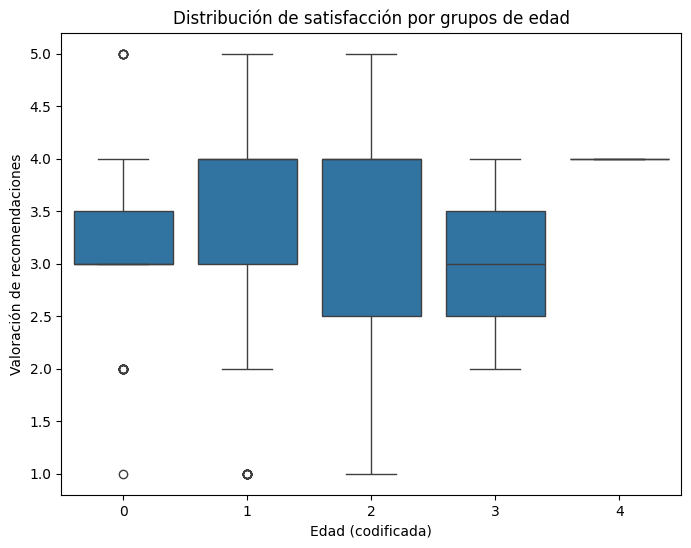

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Age', y='music_recc_rating', data=df)
plt.title("Distribución de satisfacción por grupos de edad")
plt.xlabel("Edad (codificada)")
plt.ylabel("Valoración de recomendaciones")
plt.show()


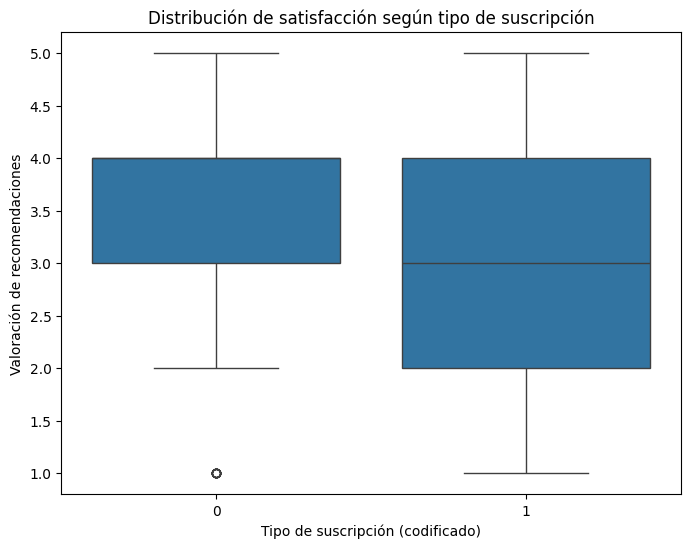

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x='spotify_subscription_plan', y='music_recc_rating', data=df)
plt.title("Distribución de satisfacción según tipo de suscripción")
plt.xlabel("Tipo de suscripción (codificado)")
plt.ylabel("Valoración de recomendaciones")
plt.show()


# **3. Análisis estadístico**

Chi-cuadrado Edad vs Tipo de suscripción:
spotify_subscription_plan  Free (ad-supported)  Premium (paid subscription)
Age                                                                        
12-20                                       49                           22
20-35                                      356                           66
35-60                                       17                            6
6-12                                         1                            2
60+                                          1                            0
Chi² = 15.38, p = 0.0040

Chi-cuadrado Género vs Tipo de suscripción:
spotify_subscription_plan  Free (ad-supported)  Premium (paid subscription)
Gender                                                                     
Female                                     325                           66
Male                                        89                           25
Others                                      10      

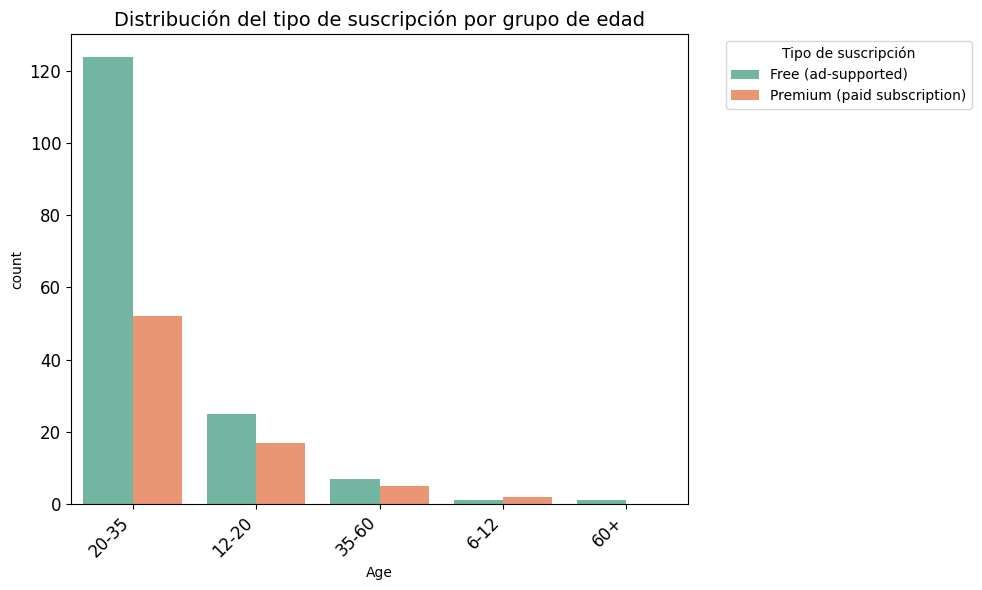

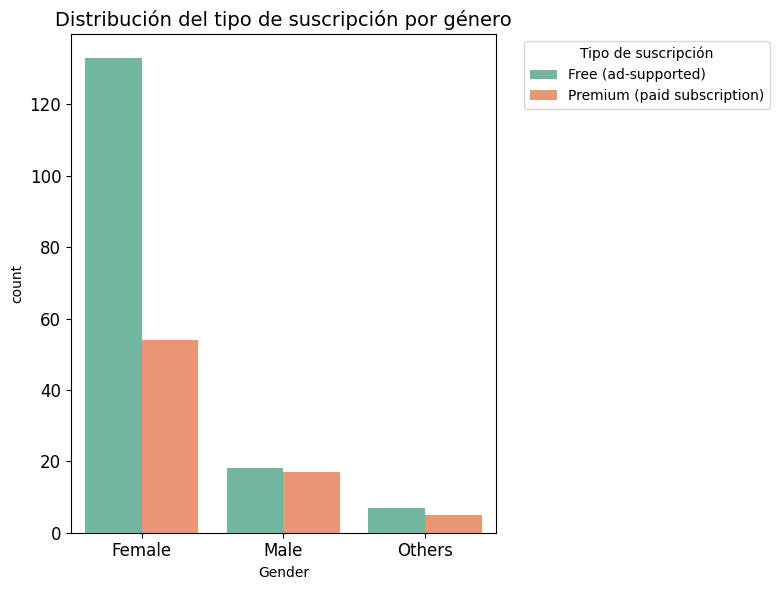

In [46]:
# Asegurar que las variables son categóricas
spotify_data['Age'] = spotify_data['Age'].astype('category')
spotify_data['Gender'] = spotify_data['Gender'].astype('category')
spotify_data['spotify_subscription_plan'] = spotify_data['spotify_subscription_plan'].astype('category')

# Tabla de contingencia: Edad vs Tipo de suscripción
age_plan_table = pd.crosstab(spotify_data['Age'], spotify_data['spotify_subscription_plan'])
chi2_age, p_age, dof_age, _ = chi2_contingency(age_plan_table)

# Tabla de contingencia: Género vs Tipo de suscripción
gender_plan_table = pd.crosstab(spotify_data['Gender'], spotify_data['spotify_subscription_plan'])
chi2_gender, p_gender, dof_gender, _ = chi2_contingency(gender_plan_table)

# Mostrar resultados
print("Chi-cuadrado Edad vs Tipo de suscripción:")
print(age_plan_table)
print(f"Chi² = {chi2_age:.2f}, p = {p_age:.4f}\n")

print("Chi-cuadrado Género vs Tipo de suscripción:")
print(gender_plan_table)
print(f"Chi² = {chi2_gender:.2f}, p = {p_gender:.4f}\n")

# Visualizaciones
plt.figure(figsize=(10, 6))
order_age = spotify_data_clean['Age'].value_counts().index
sns.countplot(data=spotify_data_clean, x='Age', hue='spotify_subscription_plan', palette='Set2', order=order_age)
plt.title('Distribución del tipo de suscripción por grupo de edad', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Tipo de suscripción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
order_gender = spotify_data_clean['Gender'].value_counts().index
sns.countplot(data=spotify_data_clean, x='Gender', hue='spotify_subscription_plan', palette='Set2', order=order_gender)
plt.title('Distribución del tipo de suscripción por género', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Tipo de suscripción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ANOVA: Género vs Valoración de recomendaciones
F = 3.08, p = 0.0466



<ipython-input-47-1750293022>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data, x='Gender', y='music_recc_rating', palette='Set2')


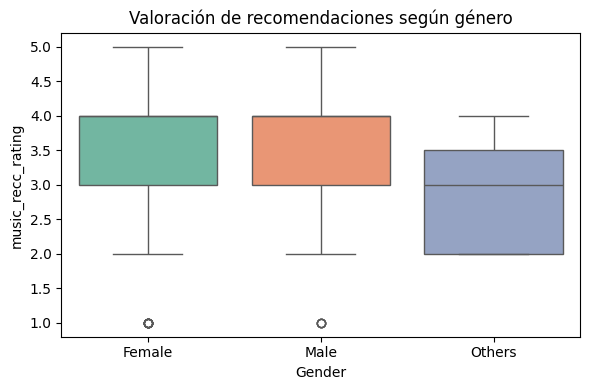

ANOVA: Edad vs Valoración de recomendaciones
F = 3.86, p = 0.0042



<ipython-input-47-1750293022>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = [group['music_recc_rating'] for name, group in spotify_data.groupby('Age')]
<ipython-input-47-1750293022>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data, x='Age', y='music_recc_rating', palette='Set2')


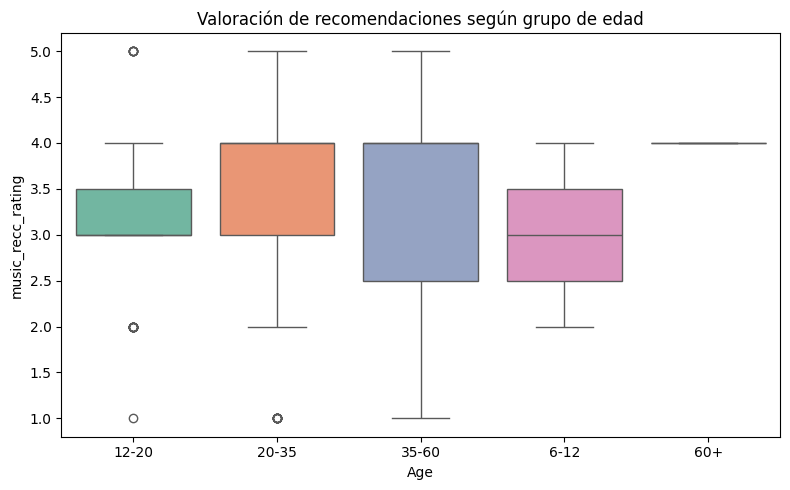

In [47]:
from scipy.stats import chi2_contingency, f_oneway
# Asegurar que las variables son categóricas
spotify_data['Gender'] = spotify_data['Gender'].astype('category')
spotify_data['Age'] = spotify_data['Age'].astype('category')

### ANÁLISIS 1: GÉNERO

# Dividir los grupos
female = spotify_data[spotify_data['Gender'] == 'Female']['music_recc_rating']
male = spotify_data[spotify_data['Gender'] == 'Male']['music_recc_rating']
others = spotify_data[spotify_data['Gender'] == 'Others']['music_recc_rating']

# ANOVA
f_gender, p_gender = f_oneway(female, male, others)

print("ANOVA: Género vs Valoración de recomendaciones")
print(f"F = {f_gender:.2f}, p = {p_gender:.4f}\n")

# Gráfico
plt.figure(figsize=(6, 4))
sns.boxplot(data=spotify_data, x='Gender', y='music_recc_rating', palette='Set2')
plt.title('Valoración de recomendaciones según género')
plt.tight_layout()
plt.show()

### ANÁLISIS 2: EDAD

# Separar grupos de edad
age_groups = [group['music_recc_rating'] for name, group in spotify_data.groupby('Age')]

# ANOVA

f_age, p_age = f_oneway(*age_groups)

print("ANOVA: Edad vs Valoración de recomendaciones")
print(f"F = {f_age:.2f}, p = {p_age:.4f}\n")

# Gráfico
plt.figure(figsize=(8, 5))
sns.boxplot(data=spotify_data, x='Age', y='music_recc_rating', palette='Set2')
plt.title('Valoración de recomendaciones según grupo de edad')
plt.tight_layout()
plt.show()


# **5. PCA**

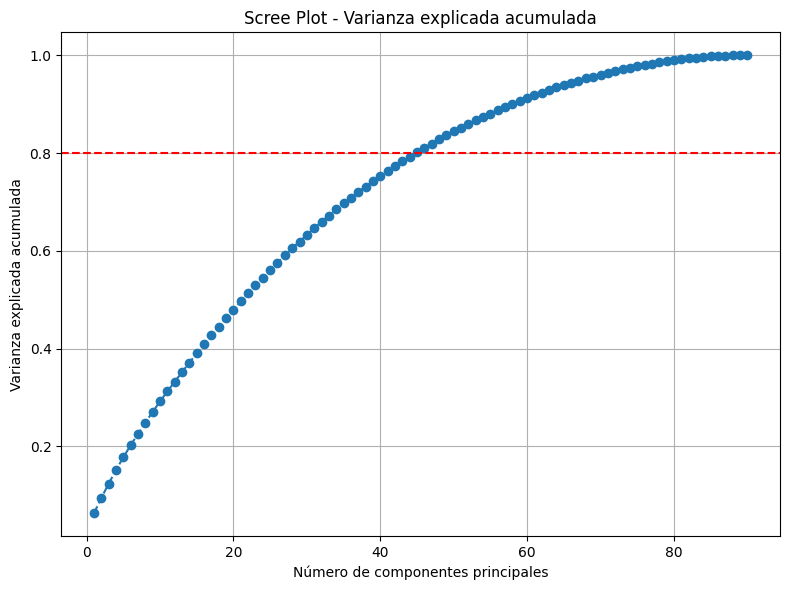

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
Age_20-35,0.204,0.038,0.054,0.059,0.072,0.077,0.137,-0.067,-0.034,-0.005,...,-0.089,-0.136,-0.036,0.054,-0.020,-0.059,-0.065,0.020,-0.001,0.009
Age_35-60,-0.080,-0.020,-0.013,-0.136,-0.040,-0.080,-0.172,-0.097,0.088,-0.063,...,-0.160,-0.096,0.026,-0.003,0.043,-0.052,-0.030,-0.019,0.003,0.005
Age_6-12,-0.076,-0.039,-0.069,-0.059,-0.063,-0.019,-0.001,-0.015,-0.047,-0.050,...,-0.044,0.070,0.085,0.035,-0.036,0.020,0.007,-0.006,-0.002,0.001
Age_60+,0.035,-0.048,0.078,-0.015,-0.089,0.002,-0.093,-0.049,0.043,0.020,...,-0.015,0.014,0.013,-0.057,-0.040,-0.013,-0.032,0.023,0.004,-0.001
Gender_Male,0.039,0.069,-0.194,0.044,0.090,-0.071,0.030,0.197,-0.089,0.016,...,0.009,0.026,-0.080,-0.051,0.115,0.022,-0.020,0.025,-0.000,-0.009
Gender_Others,-0.102,-0.034,-0.116,-0.053,-0.085,0.048,-0.091,-0.130,-0.102,-0.106,...,-0.128,-0.111,-0.009,-0.046,0.031,-0.082,0.004,0.085,0.002,-0.001
spotify_usage_period_6 months to 1 year,-0.200,0.004,0.164,0.044,-0.001,-0.056,-0.085,0.031,0.133,0.051,...,-0.165,0.086,0.112,-0.032,-0.062,-0.043,-0.017,0.099,-0.006,0.003
spotify_usage_period_Less than 6 months,0.093,-0.055,0.139,-0.138,0.306,0.074,0.112,-0.058,-0.072,-0.117,...,-0.174,0.185,0.239,-0.205,-0.020,-0.005,-0.005,-0.059,0.022,0.000
spotify_usage_period_More than 2 years,0.219,0.049,-0.258,-0.039,-0.202,-0.030,0.032,0.018,-0.047,0.056,...,-0.141,0.191,-0.041,-0.316,-0.052,-0.051,-0.054,0.015,0.028,-0.005
"spotify_listening_device_Computer or laptop, Smart speakers or voice assistants",-0.089,0.187,0.121,-0.030,-0.008,-0.110,0.187,-0.152,0.091,0.051,...,-0.095,0.215,-0.035,0.145,-0.080,-0.028,0.033,0.083,0.023,-0.003


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [54]:
# 1. LIMPIEZA Y PREPARACIÓN
spotify_data_clean = spotify_data.dropna(thresh=spotify_data.shape[1] * 0.5)

spotify_data_clean = spotify_data_clean.fillna({
    'fav_music_genre': 'Unknown',
    'music_expl_method': 'Unknown',
    'music_time_slot': 'Unknown',
    'music_Influencial_mood': 'Unknown'
})

spotify_data_clean = spotify_data_clean.dropna()

# 2. DEFINICIÓN DE VARIABLES
target = 'music_recc_rating'

cat_features = [
    'Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
    'spotify_subscription_plan', 'premium_sub_willingness',
    'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
    'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method'
]

# 3. ENCODING Y NORMALIZACIÓN
spotify_encoded = pd.get_dummies(spotify_data_clean[cat_features], drop_first=True)
spotify_encoded[target] = spotify_data_clean[target].values

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(spotify_encoded.drop(columns=target))

# 4. PCA
pca = PCA()
pca_components = pca.fit_transform(X_scaled)

# 5. VARIANZA EXPLICADA
explained_var = pca.explained_variance_ratio_
explained_var_cum = np.cumsum(explained_var)

# 6. GRÁFICO DE CODO
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var_cum)+1), explained_var_cum, marker='o', linestyle='--')
plt.axhline(y=0.80, color='red', linestyle='--')
plt.title("Scree Plot - Varianza explicada acumulada")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. LOADINGS
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=spotify_encoded.drop(columns=target).columns)

loadings_rounded = loadings.round(3)
display(loadings_rounded.head(10))


In [58]:
# Seleccionar y ordenar las 10 variables con mayor valor absoluto en PC1 y PC2

# Crear dataframe con columnas PC1 y PC2
loadings_subset = loadings[['PC1', 'PC2']]

# Calcular suma de valor absoluto de cada variable en PC1 y PC2
loadings_subset['abs_sum'] = loadings_subset.abs().sum(axis=1)

# Seleccionar las 12 variables con mayor peso conjunto en PC1 y PC2
top_variables = loadings_subset.sort_values('abs_sum', ascending=False).drop(columns='abs_sum').head(12)

# Redondear para visualización
top_variables_rounded = top_variables.round(3)
top_variables_rounded.reset_index(inplace=True)
top_variables_rounded.columns = ['Variable', 'PC1', 'PC2']
top_variables_rounded


<ipython-input-58-1714157191>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loadings_subset['abs_sum'] = loadings_subset.abs().sum(axis=1)


,Variable,PC1,PC2
0,spotify_listening_device_Smartphone,0.281,-0.151
1,"music_lis_frequency_Office hours, Study Hours,...",-0.041,0.350
2,music_time_slot_Night,0.338,-0.040
3,music_expl_method_Radio,-0.208,-0.141
4,music_Influencial_mood_Uplifting and motivatio...,-0.027,0.313
5,"spotify_listening_device_Computer or laptop, S...",-0.019,0.299
6,fav_music_genre_Melody,0.221,-0.096
7,music_Influencial_mood_Sadness or melancholy,-0.158,-0.156
8,spotify_listening_device_Smart speakers or voi...,-0.201,-0.106
9,fav_music_genre_classical,-0.209,0.078


from matplotlib import pyplot as plt
top_variables_rounded['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_variables_rounded['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_variables_rounded.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_variables_rounded['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_variables_rounded['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

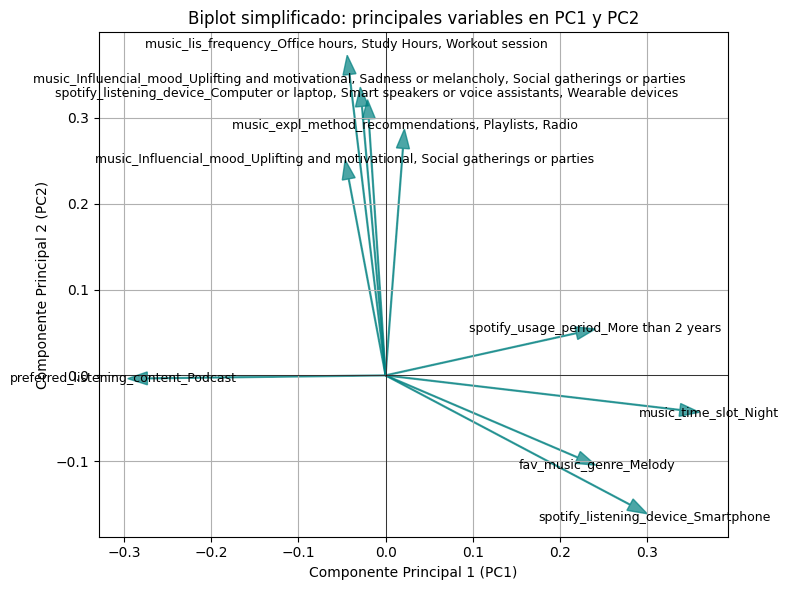

In [59]:
# Seleccionar las 10 variables con mayor contribución (valor absoluto más alto) en PC1 o PC2
loadings['max_abs'] = loadings[['PC1', 'PC2']].abs().max(axis=1)
top10_vars = loadings.sort_values('max_abs', ascending=False).head(10)

# Generar biplot simplificado
plt.figure(figsize=(8, 6))
for i, var in enumerate(top10_vars.index):
    plt.arrow(0, 0,
              top10_vars.loc[var, 'PC1'],
              top10_vars.loc[var, 'PC2'],
              color='teal', alpha=0.7, head_width=0.015)
    plt.text(top10_vars.loc[var, 'PC1'] * 1.1,
             top10_vars.loc[var, 'PC2'] * 1.1,
             var, fontsize=9, ha='center', va='center')

plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.title('Biplot simplificado: principales variables en PC1 y PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


# **5. Clustering**



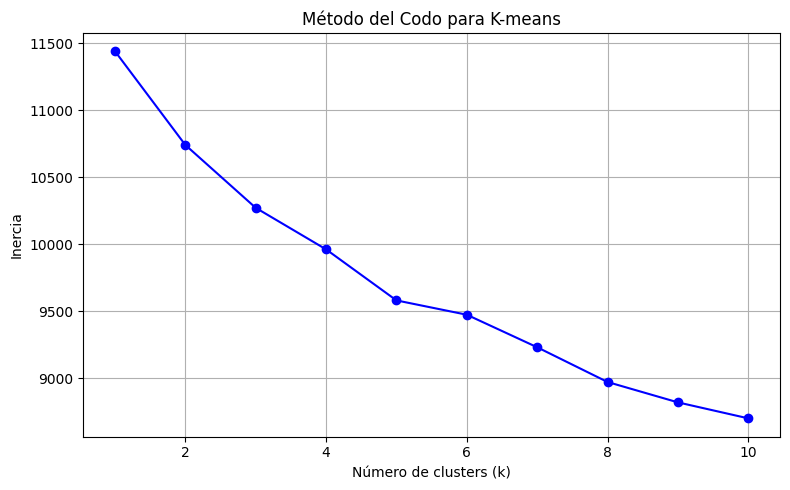

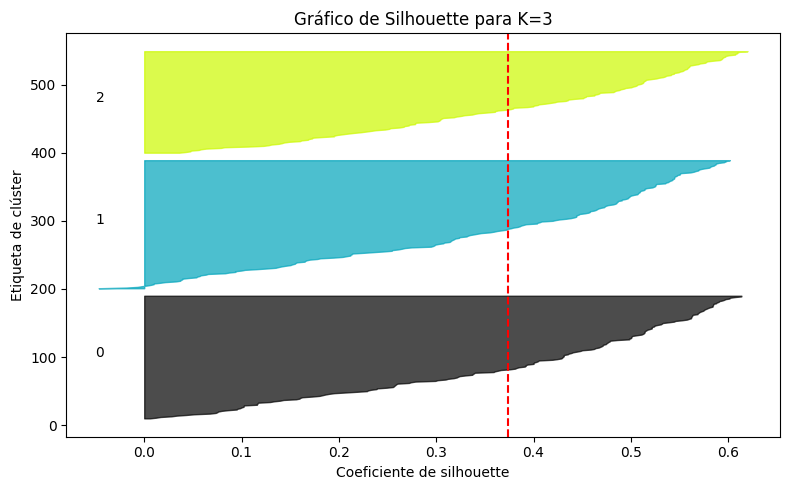

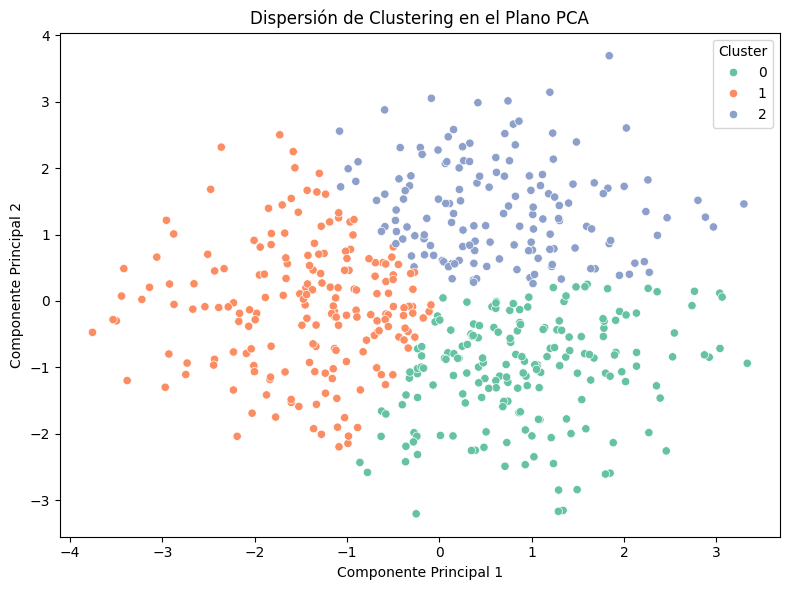

<ipython-input-61-443257276>:104: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loadings['PC1'][i], loadings['PC2'][i], color='gray', alpha=0.6)
<ipython-input-61-443257276>:105: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings['PC1'][i]*1.1, loadings['PC2'][i]*1.1, var, ha='center', va='center', fontsize=8)


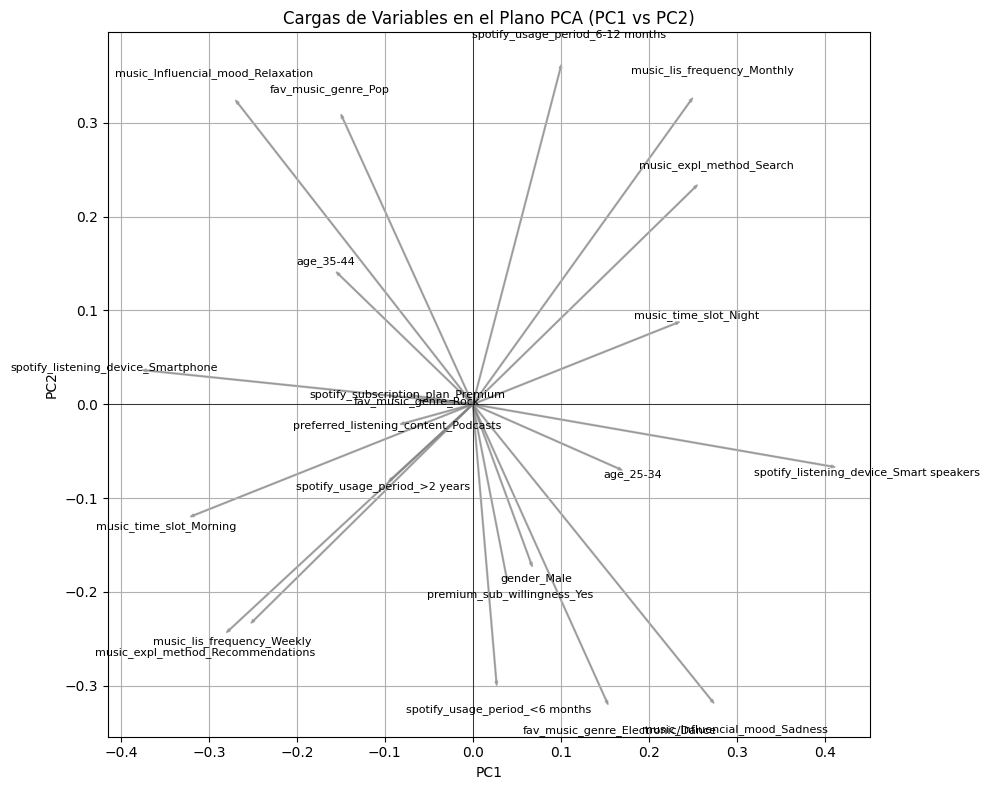

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Simulación de datos
np.random.seed(42)
spotify_data = pd.DataFrame({
    'age': np.random.choice(['18-24', '25-34', '35-44'], 520),
    'gender': np.random.choice(['Male', 'Female'], 520),
    'spotify_usage_period': np.random.choice(['<6 months', '6-12 months', '1-2 years', '>2 years'], 520),
    'spotify_listening_device': np.random.choice(['Smartphone', 'Computer', 'Smart speakers'], 520),
    'spotify_subscription_plan': np.random.choice(['Free', 'Premium'], 520),
    'premium_sub_willingness': np.random.choice(['Yes', 'No'], 520),
    'preferred_listening_content': np.random.choice(['Music', 'Podcasts'], 520),
    'fav_music_genre': np.random.choice(['Pop', 'Rock', 'Classical', 'Electronic/Dance'], 520),
    'music_time_slot': np.random.choice(['Morning', 'Afternoon', 'Night'], 520),
    'music_Influencial_mood': np.random.choice(['Relaxation', 'Energy', 'Sadness'], 520),
    'music_lis_frequency': np.random.choice(['Daily', 'Weekly', 'Monthly'], 520),
    'music_expl_method': np.random.choice(['Playlists', 'Recommendations', 'Search'], 520)
})

# Codificación y escalado
variables = [
    'age', 'gender', 'spotify_usage_period', 'spotify_listening_device',
    'spotify_subscription_plan', 'premium_sub_willingness',
    'preferred_listening_content', 'fav_music_genre',
    'music_time_slot', 'music_Influencial_mood',
    'music_lis_frequency', 'music_expl_method'
]
df_encoded = pd.get_dummies(spotify_data[variables], drop_first=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# PCA con 2 componentes para visualización
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
spotify_data['pca1'] = df_pca[:, 0]
spotify_data['pca2'] = df_pca[:, 1]

# Clustering K=3
kmeans = KMeans(n_clusters=3, random_state=42)
spotify_data['cluster'] = kmeans.fit_predict(df_pca)

# Método del codo
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de silhouette
silhouette_vals = silhouette_samples(df_pca, spotify_data['cluster'])
silhouette_avg = silhouette_score(df_pca, spotify_data['cluster'])

plt.figure(figsize=(8, 5))
y_lower = 10
for i in range(3):
    ith_vals = silhouette_vals[spotify_data['cluster'] == i]
    ith_vals.sort()
    size_cluster = ith_vals.shape[0]
    y_upper = y_lower + size_cluster
    color = plt.cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_vals, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Gráfico de Silhouette para K=3")
plt.xlabel("Coeficiente de silhouette")
plt.ylabel("Etiqueta de clúster")
plt.tight_layout()
plt.show()

# Diagrama de dispersión del clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_data, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Dispersión de Clustering en el Plano PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Cargas de variables en las componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df_encoded.columns)
plt.figure(figsize=(10, 8))
for i, var in enumerate(loadings.index):
    plt.arrow(0, 0, loadings['PC1'][i], loadings['PC2'][i], color='gray', alpha=0.6)
    plt.text(loadings['PC1'][i]*1.1, loadings['PC2'][i]*1.1, var, ha='center', va='center', fontsize=8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cargas de Variables en el Plano PCA (PC1 vs PC2)')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()




# **6. Modelo de R.L**

**EXPLICATIVO**

In [62]:
data = pd.read_excel("Spotify_data.xlsx")

cols = [
    'Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
    'spotify_subscription_plan', 'premium_sub_willingness',
    'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
    'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
    'music_recc_rating'  # <- AQUI YA INCLUIMOS LA VARIABLE TARGET
]

df = data[cols].copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


**PREDICTIVO**

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

features = [
    'Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
    'spotify_subscription_plan', 'premium_sub_willingness',
    'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
    'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method'
]

X = df[features]
y = df['music_recc_rating']

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Coeficientes del modelo
coef = pd.DataFrame({'Variable': features, 'Coeficiente': model.coef_})
print("\nCoeficientes de la regresión:")
print(coef)



R2: 0.035
RMSE: 0.953

Coeficientes de la regresión:
                       Variable  Coeficiente
0                           Age    -0.022949
1                        Gender     0.015849
2          spotify_usage_period    -0.012534
3      spotify_listening_device     0.026323
4     spotify_subscription_plan    -0.411025
5       premium_sub_willingness     0.173061
6   preferred_listening_content    -0.117997
7               fav_music_genre    -0.055087
8               music_time_slot     0.218016
9        music_Influencial_mood    -0.023691
10          music_lis_frequency    -0.012292
11            music_expl_method     0.021529


**LOGIT Y RANDOM FOREST**

In [64]:
# Librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Variable binaria de rating
df['rating_binary'] = df['music_recc_rating'].apply(lambda x: 1 if x >= 4 else 0)

features = [
    'Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
    'spotify_subscription_plan', 'premium_sub_willingness',
    'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
    'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method'
]

X = df[features]
y = df['rating_binary']

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo 1: Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Resultados Regresión Logística:")
print(classification_report(y_test, y_pred_log))

# Modelo 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nResultados Random Forest:")
print(classification_report(y_test, y_pred_rf))


Resultados Regresión Logística:
              precision    recall  f1-score   support

           0       0.64      0.57      0.60        77
           1       0.62      0.68      0.65        79

    accuracy                           0.63       156
   macro avg       0.63      0.63      0.63       156
weighted avg       0.63      0.63      0.63       156


Resultados Random Forest:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61        77
           1       0.62      0.59      0.61        79

    accuracy                           0.61       156
   macro avg       0.61      0.61      0.61       156
weighted avg       0.61      0.61      0.61       156

